# Домашнее задание по предмету "Технология вычислительного эксперимента"

## Выполнила студентка группы НПМмд-01-19 Мальцева Светлана № ст.б. 1032193052

### Вариант 5, [search_engine-ww-monthly-201902-202002.csv](https://docviewer.yandex.ru/view/0/?*=FU56Cp40NGWcMLw6YI9sP193%2Bcl7InVybCI6InlhLWRpc2stcHVibGljOi8vakg3cmIwVjJQamNJMnJVd3BNVzBLMGNUL3lZYWQ2YW9DWXdGM1pUMDFBdmx6dFk0T0crb1NGK1VrNWZobUM3b3EvSjZicG1SeU9Kb25UM1ZvWG5EYWc9PTov0JfQsNC00LDQvdC40LVbMjAyMC0wNC0wMS0xMS0wNi0xNV0ucmFyIiwidGl0bGUiOiLQl9Cw0LTQsNC90LjQtVsyMDIwLTA0LTAxLTExLTA2LTE1XS5yYXIiLCJub2lmcmFtZSI6ZmFsc2UsInVpZCI6IjAiLCJ0cyI6MTU4NjM3MDM5NDUwMiwieXUiOiIyNTAyNzAyMTAxNTgwOTYzNzAzIn0%3D) 

In [72]:
import numpy as np
import pandas as pd
import sympy as sp

import matplotlib.pyplot as plt
%matplotlib inline

# 1. Чтение данных

In [73]:
with open('data.csv' , 'r') as f:
    data_table = pd.read_csv('data.csv', index_col = None, header = None)

### Пример фрагмента данных:
Несложно увидеть, что данные содержат 18 наименований браузеров, колонку с датами и 13 временных промежутков.

In [74]:
print(data_table[:3])
print()
print('Shape of data_table :', data_table.shape)

        0       1     2       3      4          5           6       7      8   \
0     Date  Google  bing  Yahoo!  Baidu  YANDEX RU  DuckDuckGo  YANDEX  Sogou   
1  2019-02   92.92  2.38    1.79   1.03       0.55        0.38    0.33   0.07   
2  2019-03   92.51  2.45    1.83   0.95       0.55        0.38     0.6   0.14   

      9       10      11    12      13      14       15     16      17     18  
0  Naver  Shenma  Ecosia   MSN  Haosou  Seznam  Mail.ru  Qwant  CocCoc  Other  
1   0.09    0.18       0  0.08    0.04    0.03     0.04   0.02    0.01   0.06  
2   0.09    0.22       0  0.08    0.05    0.03     0.04   0.02    0.01   0.06  

Shape of data_table : (14, 19)


Запишем числовые данные в отдельные массивы с наименованиями, соответствующими им в исходном файле. 

Для времени создадим отдельный массив с числами от 0 до 13 

(в оригинале время меняется от `2019-02` до `2020-02`).

In [75]:
t = np.arange(1,14)

google = np.array(data_table[1])[1:].astype(np.float)
bing   = np.array(data_table[2])[1:].astype(np.float)
yahoo  = np.array(data_table[3])[1:].astype(np.float)
baidu  = np.array(data_table[4])[1:].astype(np.float)
ya_ru  = np.array(data_table[5])[1:].astype(np.float)
duck   = np.array(data_table[6])[1:].astype(np.float)
ya     = np.array(data_table[7])[1:].astype(np.float)
sogou  = np.array(data_table[8])[1:].astype(np.float)
naver  = np.array(data_table[9])[1:].astype(np.float)
shenma = np.array(data_table[10])[1:].astype(np.float)
ecosia = np.array(data_table[11])[1:].astype(np.float)
msn    = np.array(data_table[12])[1:].astype(np.float)
haosou = np.array(data_table[13])[1:].astype(np.float)
seznam = np.array(data_table[14])[1:].astype(np.float)
mail   = np.array(data_table[15])[1:].astype(np.float)
qwant  = np.array(data_table[16])[1:].astype(np.float)
coccoc = np.array(data_table[17])[1:].astype(np.float)
other  = np.array(data_table[18])[1:].astype(np.float)

# 2. Построение графиков зависимости данных
Из-за неудобства чтения графика всех данных, разобьём данные на 3 категории: на 1 и 2 графиках отсекаем всё, что остаётся ниже красной пунктирной линии. 

Итого получается 3 группы:
* Google;
* Bing, Yahoo, Baidu, Yandex_RU, DuckDuckGo, Yandex, Sogou, Shenma;
* Naver, MSN, Haosou, Seznam, Mail.ru, Qwant, Coccoc, Otner.

Ниже представлены более крупные графики для каждой из категорий.

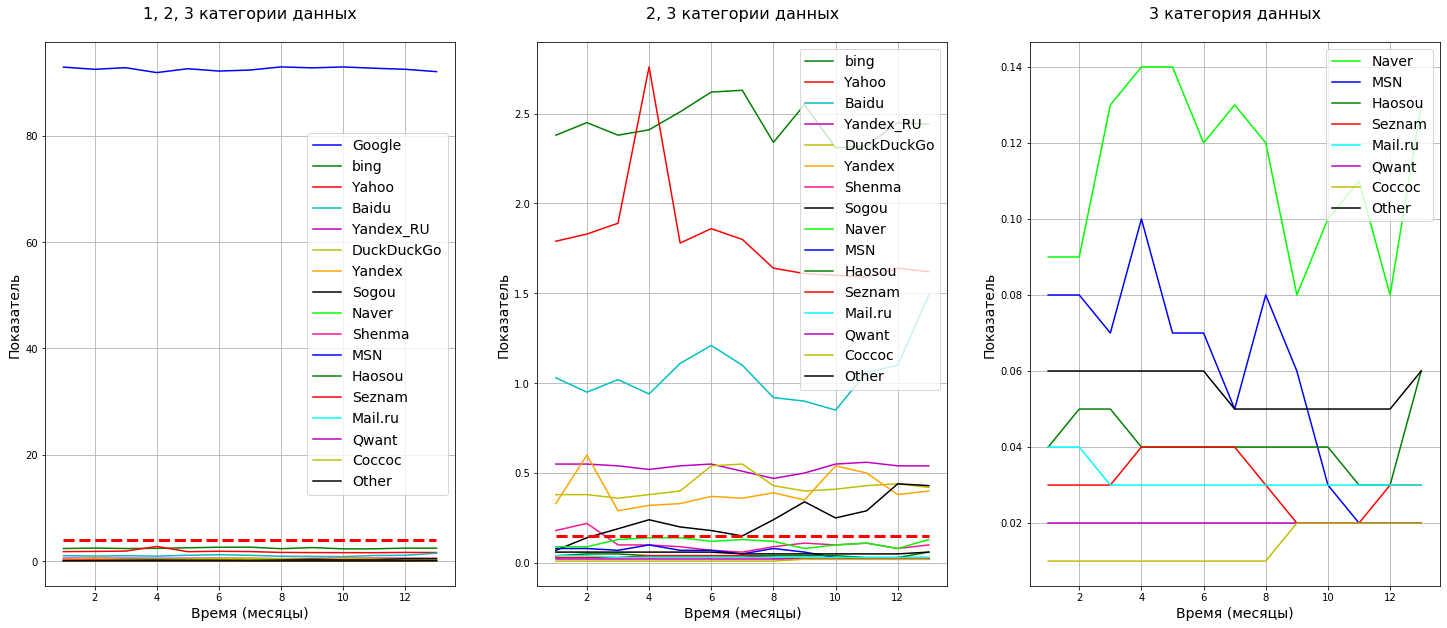

In [76]:
z = np.zeros(len(t)) + 4 

fig, ax = plt.subplots(1, 3, figsize=(25, 10))
ax[0].plot(t, google,'r', color = 'b', lw = 1.5, label = 'Google')
ax[0].plot(t, bing,  'r', color = 'g', lw = 1.5, label ='bing')
ax[0].plot(t, yahoo, 'r', color = 'r', lw = 1.5, label = 'Yahoo')
ax[0].plot(t, baidu, 'r', color = 'c', lw = 1.5, label = 'Baidu')
ax[0].plot(t, ya_ru, 'r', color = 'm', lw = 1.5, label = 'Yandex_RU')
ax[0].plot(t, duck,  'r', color = 'y', lw = 1.5, label = 'DuckDuckGo')
ax[0].plot(t, ya,    'r', color = 'orange', lw = 1.5, label = 'Yandex')
ax[0].plot(t, sogou, 'r', color = 'k', lw = 1.5, label = 'Sogou')
ax[0].plot(t, naver, 'r', color = 'lime', lw = 1.5, label = 'Naver')
ax[0].plot(t, shenma,'r', color = 'deeppink', lw = 1.5, label = 'Shenma')
ax[0].plot(t, msn ,  'r', color = 'b', lw = 1.5, label = 'MSN')
ax[0].plot(t, haosou,'r', color = 'g', lw = 1.5, label = 'Haosou')
ax[0].plot(t, seznam,'r', color = 'r', lw = 1.5, label = 'Seznam')
ax[0].plot(t, mail,  'r', color = 'cyan', lw = 1.5, label = 'Mail.ru')
ax[0].plot(t, qwant, 'r', color = 'm', lw = 1.5, label = 'Qwant')
ax[0].plot(t, coccoc,'r', color = 'y', lw = 1.5, label = 'Coccoc')
ax[0].plot(t, other, 'r', color = 'k', lw = 1.5, label = 'Other')
ax[0].set_title('1, 2, 3 категории данных\n', fontsize = 16)
ax[0].set_xlabel('Время (месяцы)', fontsize = 14)
ax[0].set_ylabel('Показатель', fontsize = 14)
ax[0].plot(t, z, '--', color = 'r', lw = 3)
ax[0].legend(fontsize = 14)
ax[0].grid()

ax[1].plot(t, bing,  'r', color = 'g', lw = 1.5, label ='bing')
ax[1].plot(t, yahoo, 'r', color = 'r', lw = 1.5, label = 'Yahoo')
ax[1].plot(t, baidu, 'r', color = 'c', lw = 1.5, label = 'Baidu')
ax[1].plot(t, ya_ru, 'r', color = 'm', lw = 1.5, label = 'Yandex_RU')
ax[1].plot(t, duck,  'r', color = 'y', lw = 1.5, label = 'DuckDuckGo')
ax[1].plot(t, ya,    'r', color = 'orange', lw = 1.5, label = 'Yandex')
ax[1].plot(t, shenma,'r', color = 'deeppink', lw = 1.5, label = 'Shenma')
ax[1].plot(t, sogou, 'r', color = 'k', lw = 1.5, label = 'Sogou')
ax[1].plot(t, naver, 'r', color = 'lime', lw = 1.5, label = 'Naver')
ax[1].plot(t, msn ,  'r', color = 'b', lw = 1.5, label = 'MSN')
ax[1].plot(t, haosou,'r', color = 'g', lw = 1.5, label = 'Haosou')
ax[1].plot(t, seznam,'r', color = 'r', lw = 1.5, label = 'Seznam')
ax[1].plot(t, mail,  'r', color = 'cyan', lw = 1.5, label = 'Mail.ru')
ax[1].plot(t, qwant, 'r', color = 'm', lw = 1.5, label = 'Qwant')
ax[1].plot(t, coccoc,'r', color = 'y', lw = 1.5, label = 'Coccoc')
ax[1].plot(t, other, 'r', color = 'k', lw = 1.5, label = 'Other')
ax[1].set_title('2, 3 категории данных\n', fontsize = 16)
ax[1].set_xlabel('Время (месяцы)', fontsize = 14)
ax[1].set_ylabel('Показатель', fontsize = 14)
ax[1].plot(t, z - 3.85, '--', color = 'r', lw = 3)
ax[1].legend(fontsize = 14)
ax[1].grid()

ax[2].plot(t, naver, 'r', color = 'lime', lw = 1.5, label = 'Naver')
ax[2].plot(t, msn ,  'r', color = 'b', lw = 1.5, label = 'MSN')
ax[2].plot(t, haosou,'r', color = 'g', lw = 1.5, label = 'Haosou')
ax[2].plot(t, seznam,'r', color = 'r', lw = 1.5, label = 'Seznam')
ax[2].plot(t, mail,  'r', color = 'cyan', lw = 1.5, label = 'Mail.ru')
ax[2].plot(t, qwant, 'r', color = 'm', lw = 1.5, label = 'Qwant')
ax[2].plot(t, coccoc,'r', color = 'y', lw = 1.5, label = 'Coccoc')
ax[2].plot(t, other, 'r', color = 'k', lw = 1.5, label = 'Other')
ax[2].set_title('3 категория данных\n', fontsize = 16)
ax[2].set_xlabel('Время (месяцы)', fontsize = 14)
ax[2].set_ylabel('Показатель', fontsize = 14)
ax[2].legend(fontsize = 14)
ax[2].grid()

plt.show()

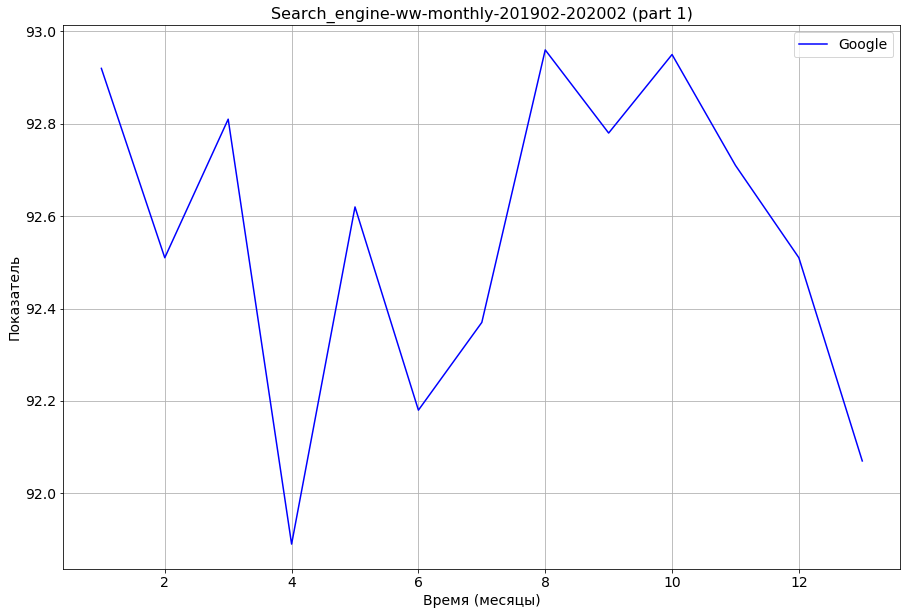

In [77]:
fig,ax = plt.subplots(figsize=[15,10])
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title('Search_engine-ww-monthly-201902-202002 (part 1)', fontsize = 16)
ax.set_xlabel('Время (месяцы)', fontsize = 14)
ax.set_ylabel('Показатель', fontsize = 14)
ax.plot(t, google,'r', color = 'b', lw = 1.5, label = 'Google')
ax.legend(fontsize = 14)
ax.grid()
plt.show()

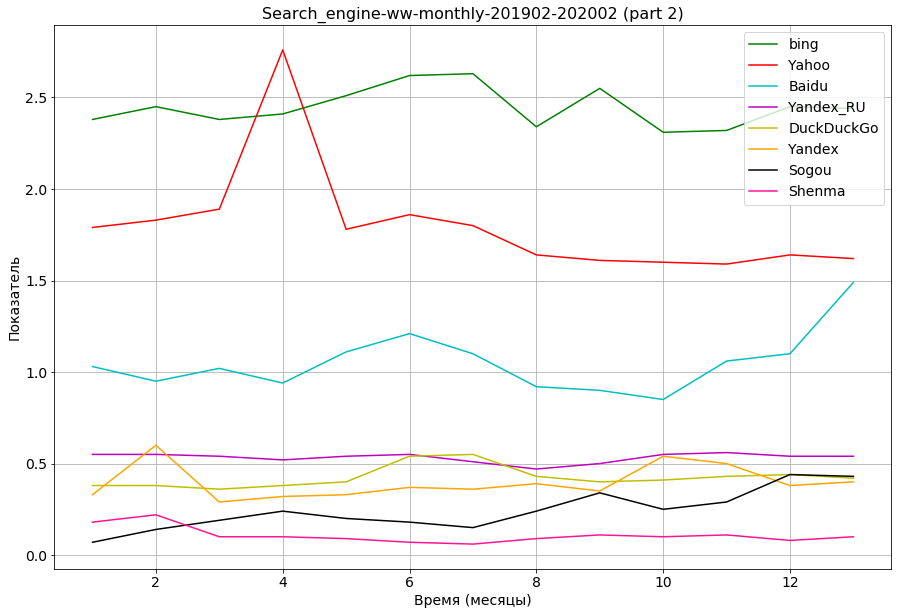

In [78]:
fig,ax = plt.subplots(figsize=[15,10])
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title('Search_engine-ww-monthly-201902-202002 (part 2)', fontsize = 16)
ax.set_xlabel('Время (месяцы)', fontsize = 14)
ax.set_ylabel('Показатель', fontsize = 14)
ax.plot(t, bing,  'r', color = 'g', lw = 1.5, label = 'bing')
ax.plot(t, yahoo, 'r', color = 'r', lw = 1.5, label = 'Yahoo')
ax.plot(t, baidu, 'r', color = 'c', lw = 1.5, label = 'Baidu')
ax.plot(t, ya_ru, 'r', color = 'm', lw = 1.5, label = 'Yandex_RU')
ax.plot(t, duck,  'r', color = 'y', lw = 1.5, label = 'DuckDuckGo')
ax.plot(t, ya,    'r', color = 'orange',   lw = 1.5, label = 'Yandex')
ax.plot(t, sogou, 'r', color = 'black',    lw = 1.5, label = 'Sogou')
ax.plot(t, shenma,'r', color = 'deeppink', lw = 1.5, label = 'Shenma')
ax.legend(fontsize = 14)
ax.grid()
plt.show()

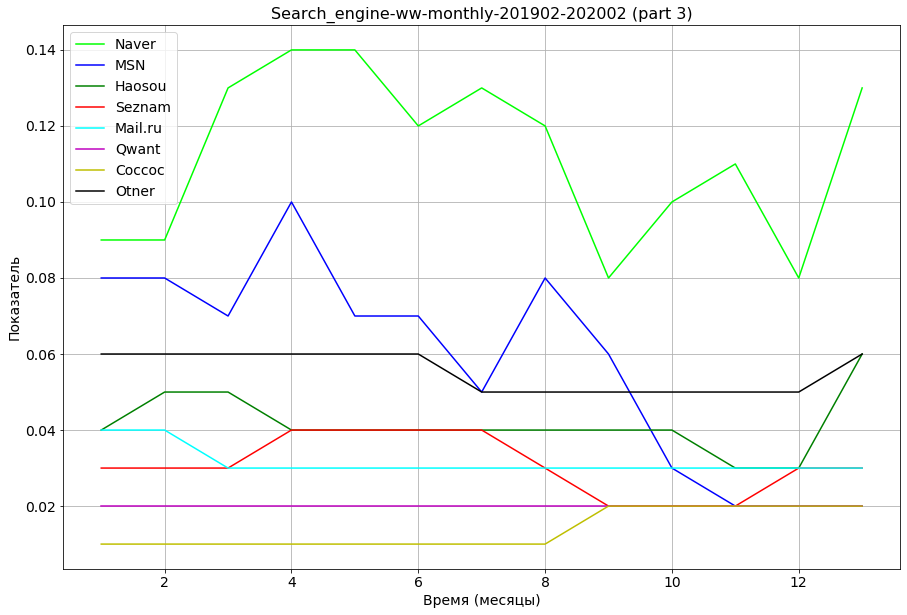

In [79]:
fig,ax = plt.subplots(figsize=[15,10])
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title('Search_engine-ww-monthly-201902-202002 (part 3)', fontsize = 16)
ax.set_xlabel('Время (месяцы)', fontsize = 14)
ax.set_ylabel('Показатель', fontsize = 14)

ax.plot(t, naver, 'r', color = 'lime', lw = 1.5, label = 'Naver')
ax.plot(t, msn ,  'r', color = 'b',    lw = 1.5, label = 'MSN')
ax.plot(t, haosou,'r', color = 'g',    lw = 1.5, label = 'Haosou')
ax.plot(t, seznam,'r', color = 'r',    lw = 1.5, label = 'Seznam')
ax.plot(t, mail,  'r', color = 'cyan', lw = 1.5, label = 'Mail.ru')
ax.plot(t, qwant, 'r', color = 'm',    lw = 1.5, label = 'Qwant')
ax.plot(t, coccoc,'r', color = 'y',    lw = 1.5, label = 'Coccoc')
ax.plot(t, other, 'r', color = 'k',    lw = 1.5, label = 'Otner')
ax.legend(fontsize = 14)
ax.grid()
plt.show()

# 3. Построение гистограммы данных
Для того, чтобы построить гистограмму самым быстрым способом, нужно импортировать данные заново - на этот раз как датафрейм.

In [138]:
df = pd.read_csv('data.csv', delimiter=',')
df.head()

,Date,Google,bing,Yahoo!,Baidu,YANDEX RU,DuckDuckGo,YANDEX,Sogou,Naver,Shenma,Ecosia,MSN,Haosou,Seznam,Mail.ru,Qwant,CocCoc,Other
0,2019-02,92.92,2.38,1.79,1.03,0.55,0.38,0.33,0.07,0.09,0.18,0.0,0.08,0.04,0.03,0.04,0.02,0.01,0.06
1,2019-03,92.51,2.45,1.83,0.95,0.55,0.38,0.60,0.14,0.09,0.22,0.0,0.08,0.05,0.03,0.04,0.02,0.01,0.06
2,2019-04,92.81,2.38,1.89,1.02,0.54,0.36,0.29,0.19,0.13,0.10,0.0,0.07,0.05,0.03,0.03,0.02,0.01,0.06
3,2019-05,91.89,2.41,2.76,0.94,0.52,0.38,0.32,0.24,0.14,0.10,0.0,0.10,0.04,0.04,0.03,0.02,0.01,0.06
4,2019-06,92.62,2.51,1.78,1.11,0.54,0.40,0.33,0.20,0.14,0.09,0.0,0.07,0.04,0.04,0.03,0.02,0.01,0.06


При построении диаграммы зафиксируем *Оy* - так проще визуально соотнести частоту появления тех или иных значений.

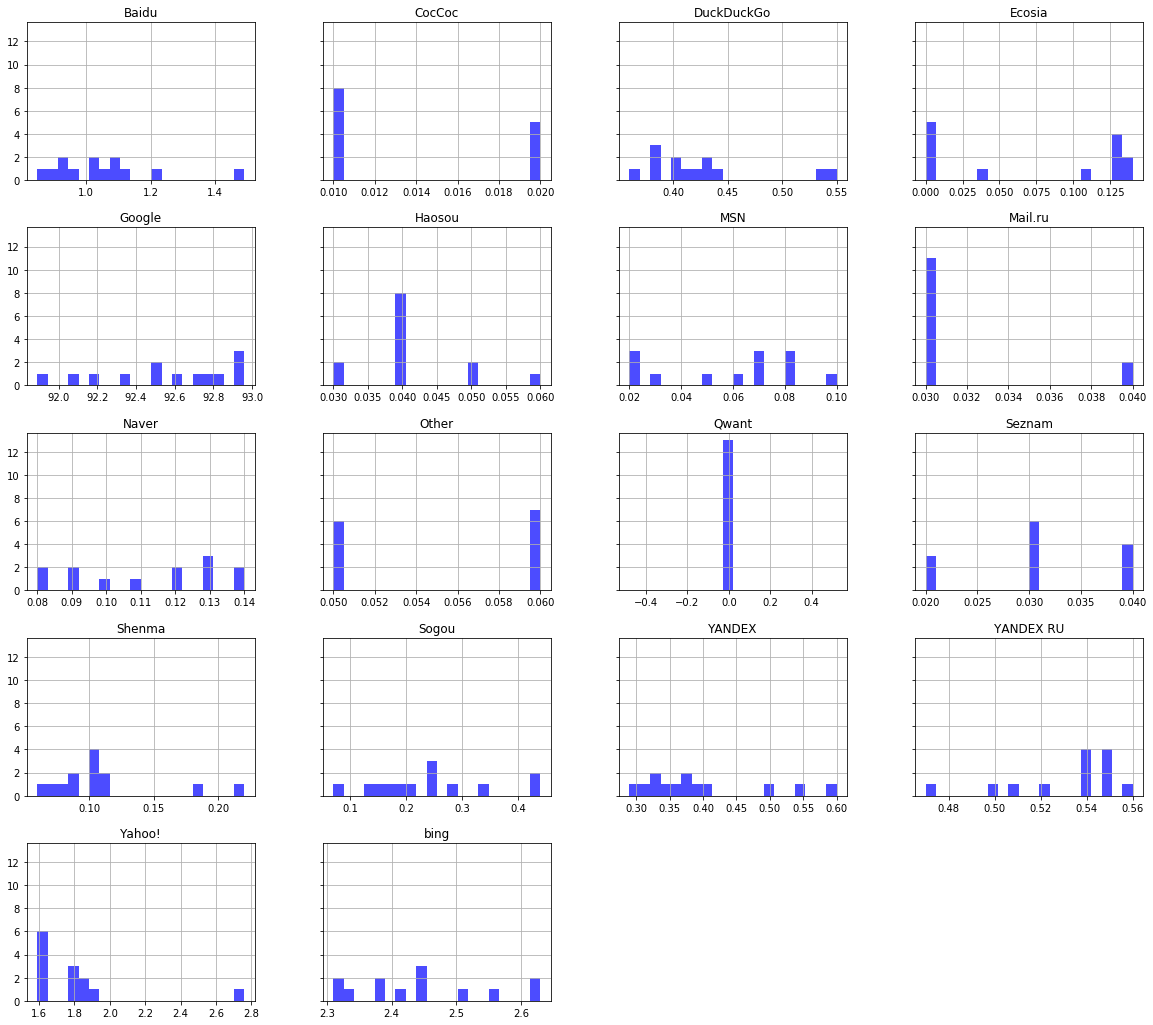

In [141]:
ax = df.hist(figsize=[20,18], color = 'b', alpha = 0.7, bins = 20, sharey=True)

### Вариант 2 - гистограмма с процентным соотношением
Такая гистограмма по сути больше напоминает круговую диаграмму, однако представляется так же интересным вариантом для реализации.

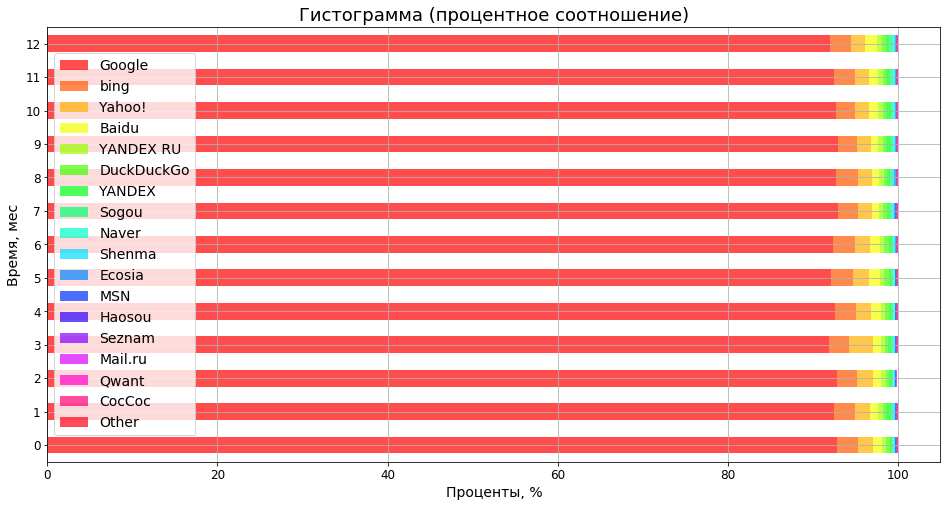

In [145]:
ax = df.iloc[:,1:].plot.barh(figsize=[16,8], stacked = True, colormap='hsv', alpha = 0.7)
ax.tick_params(axis = 'both', labelsize = 12)
ax.grid()
ax.set_title('Гистограмма (процентное соотношение)', fontsize = 18)
ax.set_xlabel('Проценты, %', fontsize = 14)
ax.set_ylabel('Время, мес', fontsize = 14)
ax.legend(fontsize = 14)

По причине того, что `Google` занимает бОльшую часть, для более детализированного взгляда на ситуацию построим второй вариант - без Google.

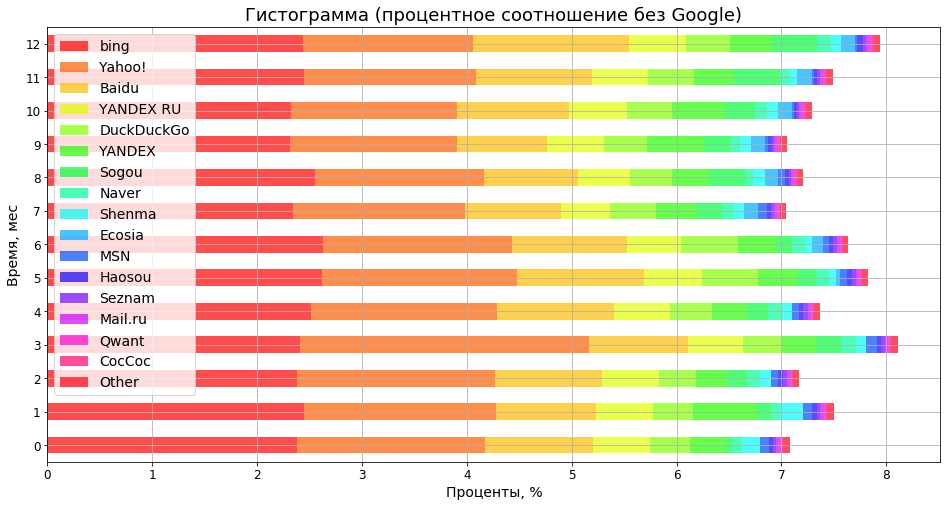

In [136]:
ax = df.iloc[:,2:].plot.barh(figsize=[16,8], stacked = True, colormap='hsv', alpha = 0.7)
ax.tick_params(axis = 'both', labelsize = 12)
ax.grid()
ax.set_title('Гистограмма (процентное соотношение без Google)', fontsize = 18)
ax.set_xlabel('Проценты, %', fontsize = 14)
ax.set_ylabel('Время, мес', fontsize = 14)
ax.legend(fontsize = 14)

# 4. Поиск аппроксимирующего полинома
В функции построения модели `model1` используются следующие соотношения:

$$A = (M^T\cdot M)^{-1} M^T \cdot Y,
$$ 

$$M = \begin{bmatrix}
 x_0^k& ... &x_0^1  &1 \\ 
 x_1^k& ... & x_1^1 & 1\\ 
 ...&  ...& ... &... \\ 
 x_n^k& ... &   x_n^1&  1\\ 
\end{bmatrix},  Y = \begin{bmatrix}
y_0\\ 
y_1\\ 
...\\
y_n
\end{bmatrix}$$.

In [82]:
def model1(X: 'время (t), arr', k: 'степень полинома, int', Y: 'данные, arr'):
    M = []
    for i in range(k+1):
        M.append(X**(k-i))
    M = np.vstack(M).T
    A = np.dot(np.linalg.inv(np.dot(M.T,M)),np.dot(M.T,Y))
    return A

Функция `mnk` строит полином $F$ с использованием заранее полученных данных из `model1`:

$$F =a_n \cdot x^n + a_{n-1} \cdot x^{n-1} + ... + a_0.$$
$a_n,...,a_0$ взяты из `A` (в аргументах функции). 

Для простоты понимания в коде использовано символьное обозначение $x$, реализованное с помощью библиотеки `sympy`.

In [83]:
x = sp.symbols('x') 

def mnk(A: 'модель данных, arr', arg: 'время (t), arr'):
    f = np.zeros(len(A))
    res = 0
    for coef in list(A):
        res = res * x + coef
    F = []
    for i in (list(arg)):
        F.append(res.subs(x,i))     
    return F

### Поиск оптимальной степени полинома
Оптимальная степень позволяет построить полином с наименьшей ошибкой. 

А значит, он будет иметь внешний вид, наиболее схожий с исходным набором данных.

In [84]:
def opt(X: 'время (t), arr', Y: 'данные, arr'):
    k = 0
    min0 =  np.sum((Y - mnk(model1(X,0,Y), X)) **2)
    min1 = np.sum((Y - mnk(model1(X,1,Y), X)) **2)
    while min1 < min0:
        k += 1
        min0 =  np.sum((Y - mnk(model1(X,k,Y), X)) **2)
        min1 = np.sum((Y - mnk(model1(X,k+1,Y), X)) **2)
    print('Оптимальная степень полинома:', k)
    return(k)

# 5. Точность аппроксимирующего полинома
Для оценки точности построенного полинома используем среднее квадратическое отклонение:
$$ \sum_{i=1}^{n}(y -y _i)^2$$
где $y$ - исходный набор данных, $y_i$ - значения, полученные с помощью аппроксимирующего полинома.

In [90]:
def sco(k: 'степень полинома, int',X: 'время (t), arr', Y: 'данные, arr'):
    e = []
    summ = 0
    for i in range(1,k+1):
        summ = (Y - mnk(model1(X,i,Y), X)) **2
        e.append(np.sum(summ))
    #print('err =', e)
    return e

### План анализа наборов данных
1. Ищем оптимальную степень полинома;
2. Строим модель данных с этой степенью;
3. Применяем МНК;
4. Высчитываем точность аппроксимирующего полинома (значение СКО);
5. Строим графики
     1. График функции и аппроксимирующего полинома (`ax[0]`);
     2. График зависимости ошибки от степени полинома(`ax[1]`).

In [91]:
def analyze(arr, name):
    #A = model1(t,2,arr)
    n = opt(t, arr)
    A = model1(t, n ,arr)
    f = mnk(A,t)
    s = sco(n + 1, t, arr)
    num = np.arange(1,len(s)+1)
    
    fig,ax = plt.subplots(1,2,figsize = (15,3.5))    
    ax[0].tick_params(axis = 'both', labelsize = 12)
    ax[0].set_title('Функция и аппроксимируюший полином ({})'.format(name), fontsize = 14)
    ax[0].set_xlabel('Время, месяцы', fontsize = 11)
    ax[0].set_ylabel('Показатель', fontsize = 11)
    ax[0].grid()
    ax[0].plot(t, arr, 'r', color = 'blue', lw = 1.5, label = 'Функция') 
    ax[0].plot(t, f, 'r', color = 'red', lw = 1.5, label = 'Полином')
    ax[0].legend(fontsize = 13)
    
    ax[1].tick_params(axis = 'both', labelsize = 12)
    ax[1].set_title('Зависимость ошибки от степени полинома', fontsize = 14)
    ax[1].set_xlabel('Степень аппроксимирующего полинома', fontsize = 11)
    ax[1].set_ylabel('Ошибка', fontsize = 11)
    ax[1].grid()
    ax[1].plot( num, s, 'r', color = 'blue', lw = 1.5) 
    ax[1].plot( num, s, 'ro', color = 'red', markersize=5) 
    return A

### Анализ наборов данных
Для удобства работы с циклом объединяем все данные в один массив: массив названий - `names`, массив числовых данных - `arr`.

In [92]:
names = np.array(['Google', 'Bing', 'Yahoo', 'Baidu', 'Yandex_RU', 'DuckDuckGo', 'Yandex',\
                  'Sogou', 'Naver', 'Shenma', 'Ecosia', 'MSN', 'Haosou', 'Seznam', 'Mail.ru',\
                  'Qwant', 'Coccoc', 'Other'])
arr   = np.array([[google], [bing], [yahoo], [baidu], [ya_ru],\
                 [duck], [ya], [sogou], [naver], [shenma],[ecosia], \
                 [msn], [haosou], [seznam], [mail], [qwant], [coccoc],\
                 [other]])

     Google : Оптимальная степень полинома: 8
       Bing : Оптимальная степень полинома: 8
      Yahoo : Оптимальная степень полинома: 8
      Baidu : Оптимальная степень полинома: 8
  Yandex_RU : Оптимальная степень полинома: 8
 DuckDuckGo : Оптимальная степень полинома: 8
     Yandex : Оптимальная степень полинома: 8
      Sogou : Оптимальная степень полинома: 8
      Naver : Оптимальная степень полинома: 8
     Shenma : Оптимальная степень полинома: 8
     Ecosia : Оптимальная степень полинома: 8
        MSN : Оптимальная степень полинома: 8
     Haosou : Оптимальная степень полинома: 8
     Seznam : Оптимальная степень полинома: 8
    Mail.ru : Оптимальная степень полинома: 8
      Qwant : Оптимальная степень полинома: 0
     Coccoc : Оптимальная степень полинома: 8
      Other : Оптимальная степень полинома: 8


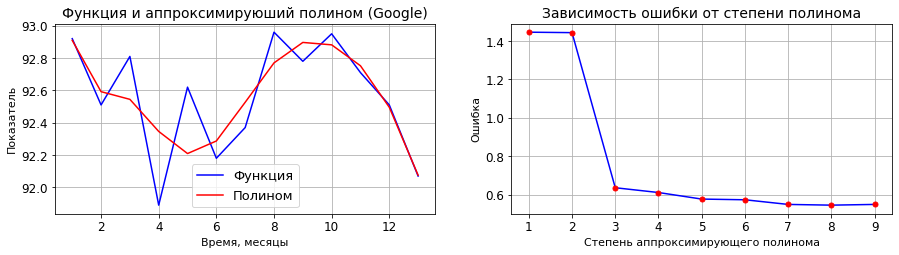

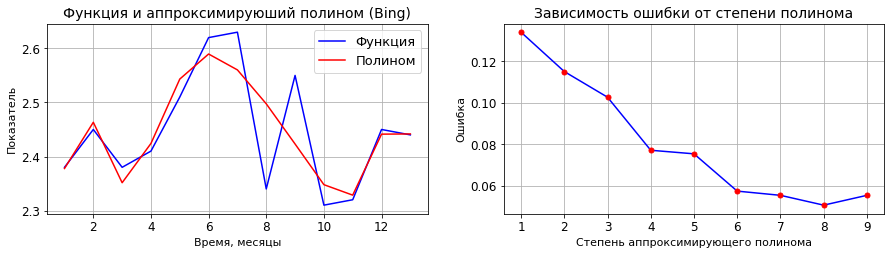

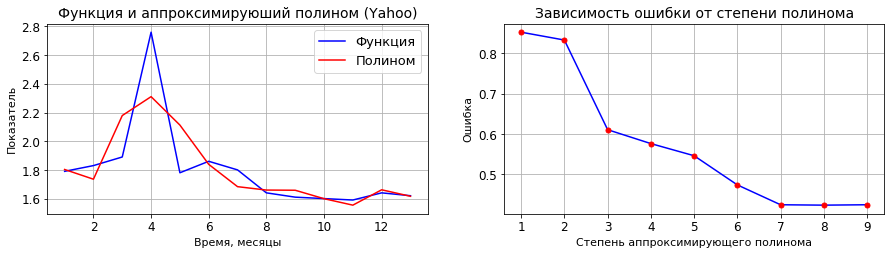

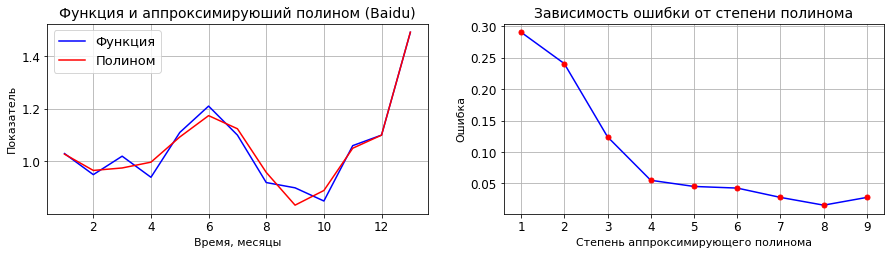

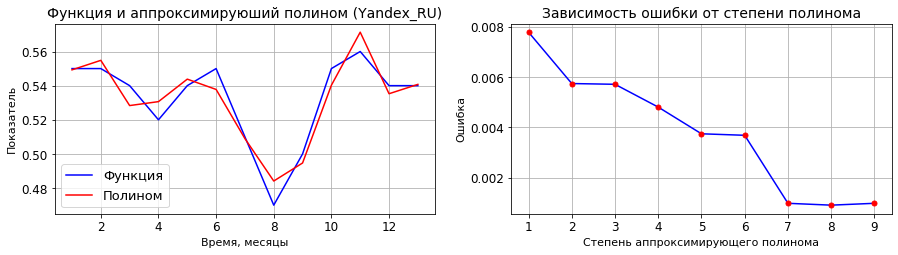

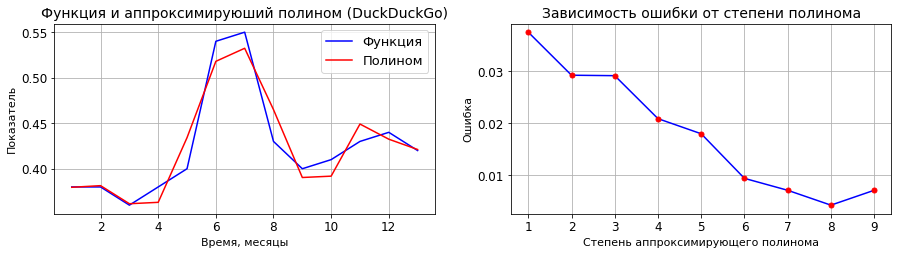

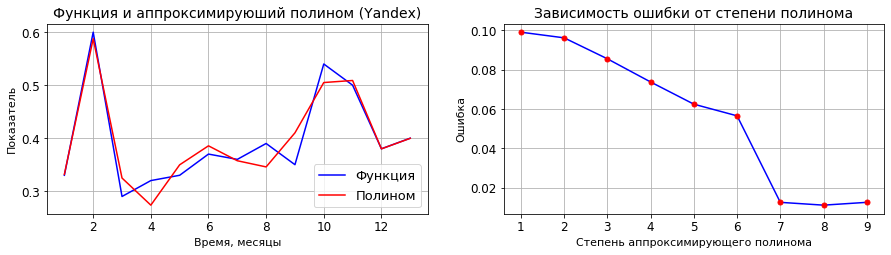

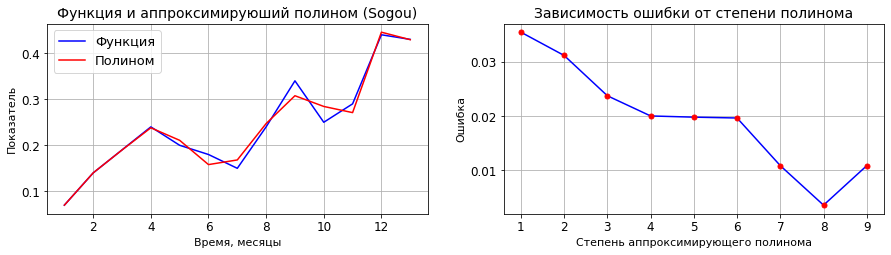

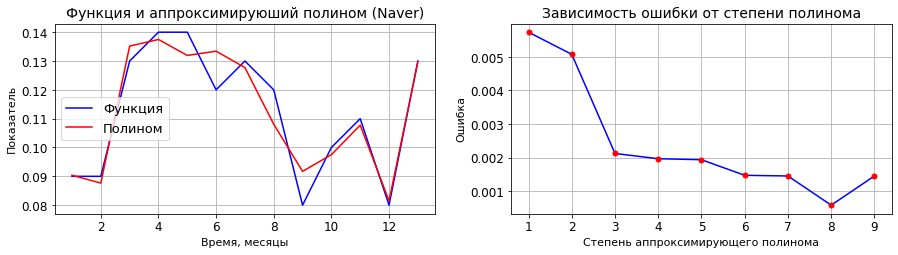

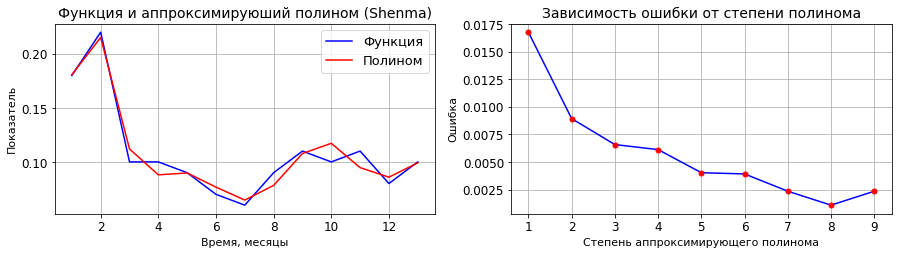

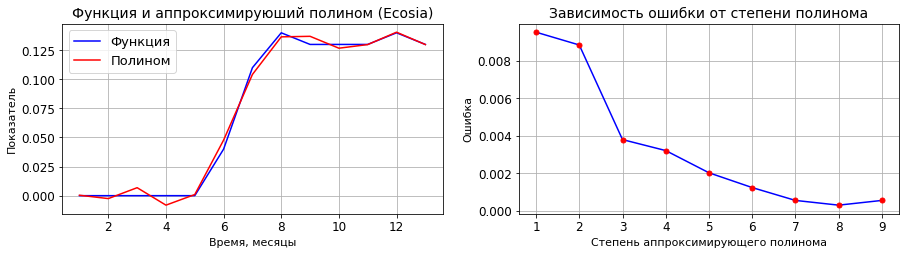

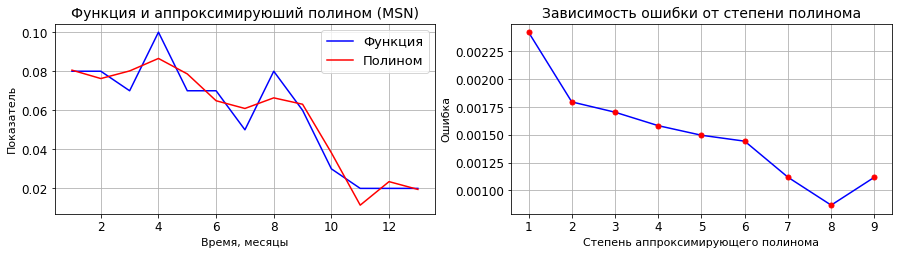

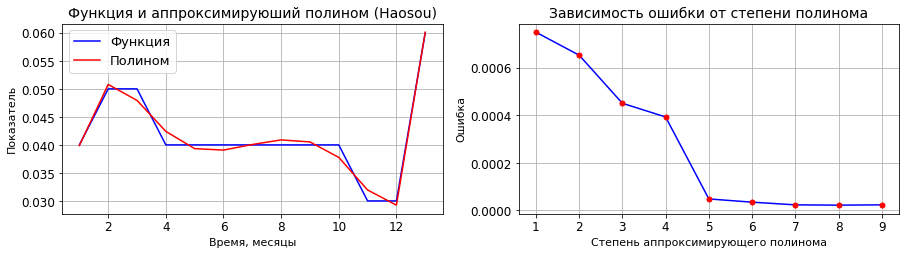

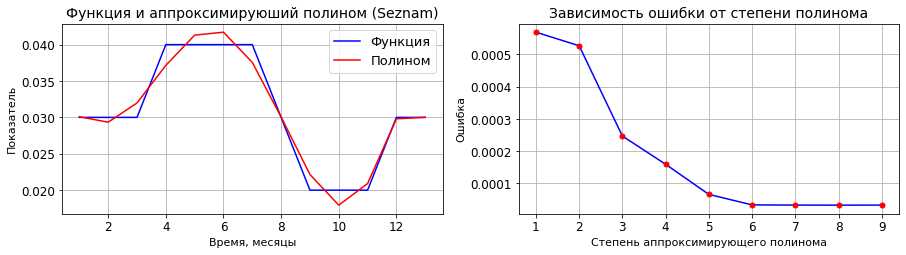

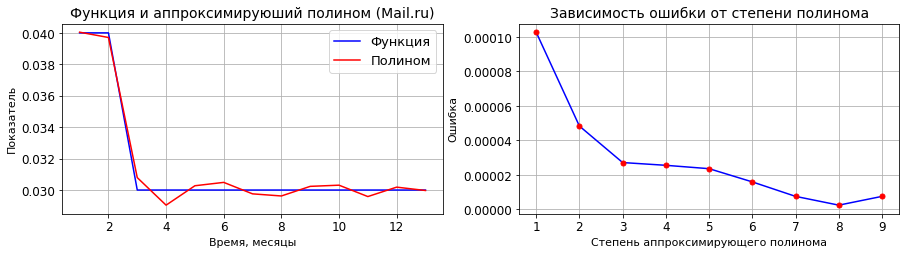

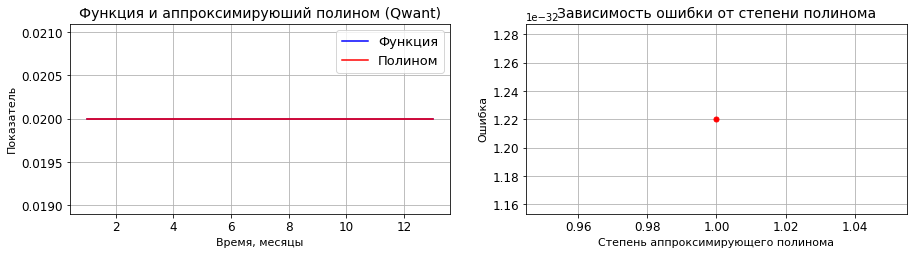

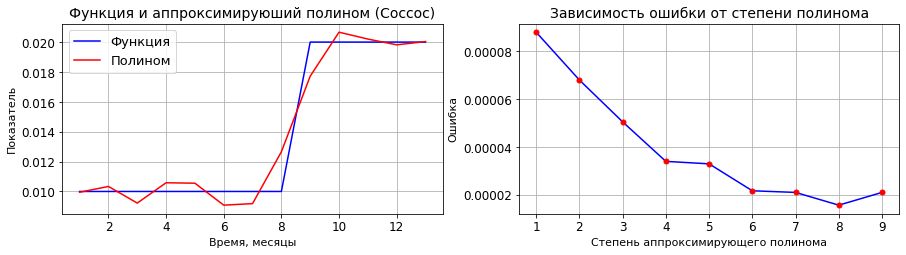

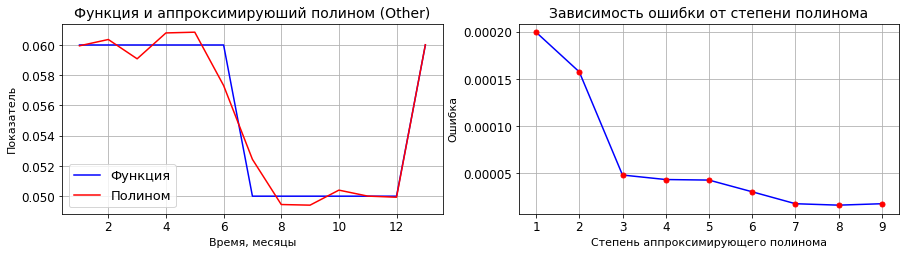

In [93]:
for i in range(len(arr)):
    array = np.reshape(arr[i], 13)
    name = names[i]
    print("%11s" % (name), ':', end = ' ')
    analyze(array, name)